# 1. Знакомство с данными. 

In [149]:
# Чтение и работа с данными
import pandas as pd
import numpy as np

# Визуализация зависимостей и распределений в данных
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from mpl_toolkits.mplot3d import Axes3D

# Контейнер для последовательных преобразований данных
from sklearn import pipeline
from sklearn.pipeline import Pipeline

# Стандартизация данных
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Метод линейной трансформации данных
from sklearn import decomposition
from sklearn.decomposition import PCA

# Метод нелинейной трансформации данных
from sklearn import manifold
from sklearn.manifold import TSNE

# Методы клаcтеризации
from sklearn import cluster
from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn import mixture
from sklearn.mixture import GaussianMixture

# Создание выборок данных и подбор гиперпараметров ML-моделей 
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Модели ML
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Метрики оценки качества моделей
from sklearn import metrics
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Визуальная настройка графиков
sns.set_theme("notebook") 
sns.set_palette("Set2")
plt.rcParams["patch.force_edgecolor"] = True

# Игнорирование возможных предупреждений
import warnings 
warnings.filterwarnings("ignore")

✍ Первым делом необходимо понять, с какими данными нам предстоит работать, и произвести базовую предобработку данных, переведя признаки в необходимые для дальнейшей работы форматы.

Для начала познакомимся с нашими данными:

In [150]:
# Читаем наш датасет 
data = pd.read_csv(
    './data/customer_segmentation_project.csv', 
    encoding='ISO-8859-1', 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print(f'Размер исходных данных: {data.shape}')
data.head(5)

Размер исходных данных: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


Итак, у нас есть данные о более чем полумиллионе транзакций. Каждая из них описывается следующими признаками:

* `InvoiceNo` — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква 'C' в начале кода указывает на отмену транзакции);

* `StockCode` — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);

* `Description` — название товара;

* `Quantity` — количество каждого товара за транзакцию; 

* `InvoiceDate` — дата и время выставления счёта/проведения транзакции;

* `UnitPrice` — цена за единицу товара в фунтах стерлингов;

* `CustomerID` — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);

* `Country` — название страны, в которой проживает клиент.

Проведём анализ структуры таблицы.


Выведем основную информацию о типах данных в столбцах:

In [151]:
# Выводим основную информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


Проверим датасет на наличие в нём пропусков: 

In [152]:
# Выводим информацию о пропусках в данных
print(f'Всего пропусков в данных: {data.isnull().sum().sum()}')
data.isnull().sum()

Всего пропусков в данных: 136534


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Судя по описанию задачи, нам должны были предоставить данные за годовой период — проверим, так ли это? Преобразуем столбец `InvoiceDate` в формат `datetime` и выясним, за какой промежуток времени представлены данные:

In [153]:
# Преобразовываем столбец 'InvoiceDate' в формат 'datetime'
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], dayfirst=False)
# Проверяем результат преобразования
data['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

Посмотрим на основные описательные статистики, чтобы уже на этом этапе наметить план работ по обработке признаков:

In [154]:
# Выводим основные описательные статистики для числовых столбцов
data.describe().round()

,Quantity,InvoiceDate,UnitPrice
count,541909.0,541909,541909.0
mean,10.0,2011-07-04 13:34:57.156386048,5.0
min,-80995.0,2010-12-01 08:26:00,-11062.0
25%,1.0,2011-03-28 11:34:00,1.0
50%,3.0,2011-07-19 17:17:00,2.0
75%,10.0,2011-10-19 11:27:00,4.0
max,80995.0,2011-12-09 12:50:00,38970.0
std,218.0,NaN,97.0


In [155]:
# Узнаем сколько стоит самый дешёвый товар
data['UnitPrice'].sort_values(ascending=True)

299984   -11062.06
299983   -11062.06
40984         0.00
52217         0.00
52262         0.00
            ...   
16356     13541.33
43703     16453.71
43702     16888.02
524602    17836.46
222681    38970.00
Name: UnitPrice, Length: 541909, dtype: float64

In [156]:
# Выводим основные описательные статистики для столбцов типа 'object'
data.describe(include='object')

,InvoiceNo,StockCode,Description,CustomerID,Country
count,541909,541909,540455,406829,541909
unique,25900,4070,4223,4372,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841,United Kingdom
freq,1114,2313,2369,7983,495478


# 2. Предобработка и очистка данных

✍ На этом этапе нам предстоит подготовить наш датасет для дальнейшего моделирования, произведя очистку данных.

Начнем с пропусков.

Пропуски в столбце с идентификатором клиента и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалим строки, содержащие пропуски в этих столбцах:

In [157]:
# Выводим информацию о пропусках в данных
print(f'Всего пропусков в данных: {data.isnull().sum().sum()}')
data.isnull().sum()

Всего пропусков в данных: 136534


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [158]:
# Удаляем строки содержащие пропуски и проверяем результат очистки данных
data = data.dropna(axis=0)
print(f'Всего пропусков в данных: {data.isnull().sum().sum()}')
print(f'Результирующий размер таблицы: {data.shape}')

Всего пропусков в данных: 0
Результирующий размер таблицы: (406829, 8)


Следом за пропусками проверим наличие дубликатов, и если они имеются, удалим их из таблицы:

In [159]:
# Выводим информацию о дубликатах в данных
print(f'Всего дубликатов в данных: {data.duplicated().sum()}')

Всего дубликатов в данных: 5225


In [160]:
# Удаляем строки содержащие дубликаты и проверяем результат очистки данных
data = data.drop_duplicates()
print(f'Результирующий размер таблицы: {data.shape}')

Результирующий размер таблицы: (401604, 8)


Ранее мы заметили, что в столбце с количеством товара есть отрицательные значения. Давайте разберемся, откуда они взялись. Выведем первые 5 строк таблицы, в которой столбец `Quantity` меньше 0:

In [161]:
# Выводим информацию о строках с отрицательным количеством товара
negative_quantity = data[(data['Quantity'] < 0)]
print(f'Строк с отрицательным количеством товара: {negative_quantity.shape[0]}')
negative_quantity.head()

Строк с отрицательным количеством товара: 8872


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


Итак, таких записей почти девять тысяч. Не похоже на какую-то ошибку или выбросы, ведь случаев слишком много.

При просмотре таблицы можно заметить следующее:

* Номер заказа (`InvoiceNo`) и код товара (`StockCode`) могут содержать не только числа, но и символы.

* Как было сказано в описании датасета, символ 'C' перед номером заказа указывает на возврат. То есть, по идее, в таблице должна также находиться запись с точно такими же идентификаторами клиента и товара, но c номером заказа без символа 'C' и c положительным количеством товара.

* Код товара может содержать различные специальные символы: например, символ 'D', судя по описанию товара (столбец `Description`), означает наличие скидки.

* Как на каждый уникальный товар, так и на его возврат заводится отдельная транзакция (запись в таблице).

Выдвинем гипотезу, что все записи из таблицы с отрицательным количеством товара действительно являются возвратными транзакциями. Если транзакция не является возвратом, но содержит отрицательное количество товара, это будет поводом считать её выбросом:

In [162]:
# Проверяем нашу гипотезу
print(f'Все номера заказов в таблице "negative_quantity" - возвратные: {negative_quantity.shape[0] == negative_quantity['InvoiceNo'].str.contains('C').count()}')

Все номера заказов в таблице "negative_quantity" - возвратные: True


Разберёмся подробнее с возвратами. Сейчас на каждый уникальный товар заведена отдельная строка в таблице — это мешает определить общее количество возвратов.

Чтобы подсчитать число возвратов, сначала необходимо определить, сколько уникальных товаров указано в транзакции (корзине/*basket*) для каждой уникальной пары «клиент-заказ»:

In [163]:
# Создаём таблицу с необходимой нам информацией 
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})

# Проверяем результат на корректность создания таблицы
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


Теперь мы можем трезво оценить, как часто клиенты возвращают товар.

Добавим во вспомогательную таблицу `nb_products_per_basket` признак отмены заказа (`order_canceled`): он равен 1, если транзакция является возвратом, и 0 — в противном случае:

In [164]:
# Создаём интересующий нас столбец
nb_products_per_basket['order_canceled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x: 1 if x[0] == 'C' else 0)

# Проверяем результат и выводим информацию о процентах возврата
print(f'Процент заказов в таблице являющихся возвратами: {round(nb_products_per_basket['order_canceled'].value_counts()[1] / nb_products_per_basket.shape[0] * 100)}%')
nb_products_per_basket.head()

Процент заказов в таблице являющихся возвратами: 16%


,CustomerID,InvoiceNo,Number of products,order_canceled
0,12346,541431,1,0
1,12346,C541433,1,1
2,12347,537626,31,0
3,12347,542237,29,0
4,12347,549222,24,0


Давайте поближе взглянем на отменённые заказы:

In [165]:
# Выводим информацию об отменённых заказах
nb_products_per_basket[nb_products_per_basket['order_canceled'] == 1].head()

,CustomerID,InvoiceNo,Number of products,order_canceled
1,12346,C541433,1,1
23,12352,C545329,2,1
24,12352,C545330,1,1
25,12352,C547388,7,1
39,12359,C549955,2,1


Найдём в таблице со всеми транзакциями записи принадлежащие клиенту с идентификатором 12346:

In [166]:
# Ищем все пары «заказ-отмена» для клиента '12346'
data[data['CustomerID'] == '12346']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom


Итак, вот пример пары «заказ-отмена». Обратим внимание на столбцы `StockCode`, `UnitPrice`, `CustomerID` и `Quantity` — они идентичны. 

Выдвигаем гипотезу: для каждой отменённой транзакции в базе данных (таблица `data`) существует её аналог с тем же кодом товара, идентификатором клиента и противоположным значением количества товара:

In [167]:
# Для удобства создаём копию таблицы 'negative_quantity', сбрасываем индексы строк и обращаем количество товара
returns = negative_quantity.copy()
returns.reset_index(inplace=True)
returns['Quantity'] = -returns['Quantity']

# Объединяем таблицы 'returns' и 'data' по совпадающим строкам в столбцах 
matched = pd.merge(returns, data,
                   on=['StockCode', 'CustomerID', 'Quantity'], how='inner')
# Избавляемся от дубликатов в индексах
matched.drop_duplicates(subset='index', inplace=True)

# Проверяем нашу гипотезу
print(f'Количество несовпадений: {negative_quantity.shape[0] - matched.shape[0]}')

Количество несовпадений: 5626


Гипотеза не подтвердилась: не все заказы с отрицательным количеством товара имеют в таблице свои аналоги. Нужно дальше разбираться, почему так происходит.

Приведём контр-пример, на котором «споткнулась» наша прошлая гипотеза. Посмотрим на клиента с идентификатором 14527:

In [168]:
# Ищем все пары «заказ-отмена» для клиента '14527'
data[data['CustomerID'] == '14527'].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
8963,537159,22112,CHOCOLATE HOT WATER BOTTLE,6,2010-12-05 13:17:00,4.95,14527,United Kingdom
8964,537159,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-05 13:17:00,4.95,14527,United Kingdom
8965,537159,21479,WHITE SKULL HOT WATER BOTTLE,1,2010-12-05 13:17:00,3.75,14527,United Kingdom
8966,537159,22114,HOT WATER BOTTLE TEA AND SYMPATHY,6,2010-12-05 13:17:00,3.95,14527,United Kingdom


Обратим внимание на первую строку, в которой располагается заказ C536379 с признаком отмены — противоположных ему аналогов по количеству товаров мы не найдём. Причина кроется в типе товара: данный товар обозначен как товар со скидкой (`StockCode`), и, по-видимому, для таких транзакций нет аналогов с положительным числом товаров в заказе. Учтём это наблюдение на будущее.

Выдвигаем новую гипотезу: для каждой отменённой транзакции в базе данных (таблица `data`) существует её аналог с тем же кодом товара, идентификатором клиента и противоположным значением количества товара, если на товар не распространяются скидки:

In [169]:
# Для удобства создаём копию таблицы 'negative_quantity', сбрасываем индексы строк и обращаем количество товара
returns = negative_quantity[negative_quantity['StockCode'] != 'D'].copy()
returns.reset_index(inplace=True)
returns['Quantity'] = -returns['Quantity']

# Объединяем таблицы 'returns' и 'data' по совпадающим строкам в столбцах 
matched = pd.merge(returns, data,
                   on=['StockCode', 'CustomerID', 'Quantity'], how='inner')
# Избавляемся от дубликатов в индексах
matched.drop_duplicates(subset='index', inplace=True)

# Проверяем нашу гипотезу
print(f'Количество несовпадений: {negative_quantity[negative_quantity['StockCode'] != 'D'].shape[0] - matched.shape[0]}')

Количество несовпадений: 5549


Эта гипотеза тоже не подтвердилась. Даже исключив товары со скидками, мы не можем найти аналогов для отменённых заказов.

Посмотрим, где кроется наша проблема. В качестве контр-примера приведём транзакции, относящиеся к клиенту с идентификатором 15311 и товаром под кодом 35004C:

In [170]:
# Ищем все пары «заказ-отмена» для клиента '15311' и товара '35004C'
data[(data['CustomerID'] == '15311') & (data['StockCode'] == '35004C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-05 13:55:00,4.65,15311,United Kingdom
18196,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-08 13:18:00,4.65,15311,United Kingdom
28630,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-13 15:07:00,4.65,15311,United Kingdom
39381,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,2010-12-20 15:27:00,4.65,15311,United Kingdom
44157,540157,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-05 11:41:00,4.65,15311,United Kingdom
59542,541293,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-17 13:39:00,4.65,15311,United Kingdom
78333,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,2011-02-01 12:14:00,4.65,15311,United Kingdom


* На **первой строке** мы видим заказ с отменой (номер заказа начинается с символа 'C'). Однако возникает вопрос: на какой заказ пришла эта отмена, ведь более ранних записей о транзакциях, связанных с этим клиентом, нет.
Ответ состоит в том, что заказ на покупку данного товара от клиента поступил раньше декабря 2010 года, а этих данных в нашей таблице нет.

* По **двум следующим строкам** видно, что клиент может отменить не весь заказ, а только его часть (5 декабря клиент покупает 12 единиц товара, а 8 декабря оформляет возврат только на одну единицу товара). Мы должны принять это во внимание на будущее.

Итак, теперь мы знаем все особенности отмены заказов. При сегментировании клиентов мы будем определять их покупательскую способность, а для этого очень важно учитывать возвраты товаров. Поэтому создадим в данных о транзакциях признак `QuantityCanceled`, который будет указывать на количество возвращённого впоследствии товара для каждой транзакции. 

Сразу обговорим, что мы не будем учитывать сложные пограничные случаи:

1. Отменённая транзакция не имеет противоположной (на транзакцию-возврат не нашлось ни одной транзакции на покупку).

2. Количество возвращённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом).

Для реализации всего вышесказанного нам поможет функция `get_quantity_canceled()`. Она принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество возвращённого впоследствии товара для каждой транзакции. На основе результата работы этой функции мы создадим в таблице с транзакциями новый столбец `QuantityCanceled`:

In [171]:
def get_quantity_canceled(data):
    # Инициализируем нулями объект класса 'Series' той же длины, что и столбцы таблицы
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём объект класса 'DataFrame' из всех транзакций, противоположных возвратам
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзакция-возврат не имеет противоположной — ничего не делаем
        if (df_test.shape[0] == 0): 
            continue
        # Транзакция-возврат имеет только одну противоположную транзакцию
        # Добавляем количество возвращённого товара в столбец 'QuantityCanceled'
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько противоположных транзакций
        # Вносим количество возвращённого товара в столбец 'QuantityCanceled' для той транзакции на покупку,
        # в которой количество товара > (-1) * (количество товаров в транзакции-возврате)
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

# Создаём необходимый признак
data['QuantityCanceled'] = get_quantity_canceled(data)

Подсчитаем получившееся суммарное количество отмененных товаров в столбце `QuantityCanceled`: 

In [172]:
# Выводим суммарное количество отменённых товаров 
data['QuantityCanceled'].sum()

245266.0

Теперь, когда мы разобрались с транзакциями-возвратами, они больше нам не понадобятся. 

Удалим из таблицы транзакции, в поле которых указано отрицательное количество товара:

In [175]:
# Удаляем все строки с отрицательным количеством товара 
data = data.drop(index=data[data['Quantity'] < 0].index, axis=1)

# Проверяем результат очистки данных
print(f'Результирующий размер таблицы: {data.shape}')
data.head()

Результирующий размер таблицы: (392732, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0


Следующая проблема — это специальные виды транзакций. Например, ранее мы уже видели, что для товаров со скидкой признак `StockCode` обозначен как 'D'. Проверим, бывают ли другие специальные коды?

С помощью регулярных выражений найдём такие коды товаров (`StockCode`), которые начинаются с латинских букв (при этом коды могут содержать цифры).

Так как специальные операции не характеризуют наших клиентов они нам не понадобятся. Удалим все найденные специальные транзакции из таблицы:

In [176]:
# Создаём столбец с индикатором специальных видов транзакций
data['Target Code'] = data['StockCode'].str.contains('^[a-zA-Z]+', regex=True)
# Выводим количество найденных уникальных видов транзакций
print(f'Уникальных специальных видов транзакций: {data[data['Target Code'] == True]['StockCode'].nunique()}')

# Удаляем ранее созданный столбец 'Target Code' и все записи специальных операций
data = data.drop(index=data[data['Target Code'] == True].index, columns='Target Code')
# Проверяем результат очистки данных
print(f'Результирующий размер таблицы: {data.shape}')

Уникальных специальных видов транзакций: 6
Результирующий размер таблицы: (391183, 9)


На следующем шаге поработаем с ценами на товары.

Ранее при просмотре описательных статистик мы видели, что на некоторые товары установлена цена в 0 фунтов стерлингов. Нам необходимо выяснить, в скольких транзакциях цена за единицу товара равна 0:

In [ ]:
# Выводим количество транзакций с нулевой ценой за единицу товара
print(f'В {data[data['UnitPrice'] == 0].shape[0]} транзакциях цена за единицу товара равна 0')

Таких транзакций оказалось менее 1 %, поэтому от них можно просто избавиться. Удалим такие транзакции из таблицы:

In [177]:
# Удаляем все найденные записи
data = data.drop(index=data[data['UnitPrice'] == 0].index)
# Проверяем результат очистки данных
print(f'Результирующий размер таблицы: {data.shape}')

В 33 транзакциях цена за единицу товара равна 0
Результирующий размер таблицы: (391150, 9)


⭐ Этап очистки данных завершён. Теперь, можно смело переходить к следующему этапу — разведывательному анализу данных (*EDA*).

# 3. Разведывательный анализ данных

✍ Теперь займёмся разведывательным анализом и исследуем транзакции.

Перед нами стоят следующие задачи:

* Понять, клиенты из каких стран покупают больше и чаще;

* Узнать, присутствует ли в продажах сезонность (когда покупают чаще);

* Создать новые признаки, которые в дальнейшем понадобятся при формировании датасета о клиентах.

Для начала выясним, в каких странах живут клиенты.

Построим график, отражающий количество клиентов в каждой из стран. Не упускаем также из внимания тот факт, что нам нужны именно уникальные клиенты:

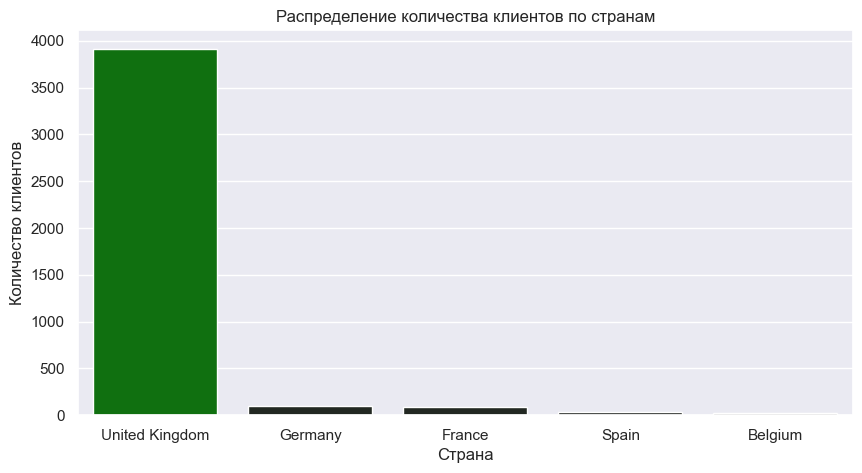

In [178]:
# Группируем количество уникальных клиентов по странам
cust_cnt_by_country = data.groupby('Country', as_index=False)['CustomerID'].nunique()

# Строим столбчатую диаграмму распределения количества клиентов по странам
plt.figure(figsize=(10, 5))

barplot = sns.barplot(cust_cnt_by_country.nlargest(5, 'CustomerID'),
              x='Country',
              y='CustomerID',
              hue='CustomerID',
              palette='dark:green',
              legend=False
)
barplot.set_title('Распределение количества клиентов по странам')
barplot.set_xlabel('Страна')
barplot.set_ylabel('Количество клиентов');

In [179]:
# Выводим полученную ранее таблицу  
cust_cnt_by_country.sort_values(by='CustomerID', ascending=False)

,Country,CustomerID
35,United Kingdom,3916
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,14
12,Finland,12
1,Austria,11


Мы посмотрели на распределение клиентов в разрезе стран. А что насчёт заказов?

Построим визуализацию и выделим топ-3 стран по количеству поступающих заказов:

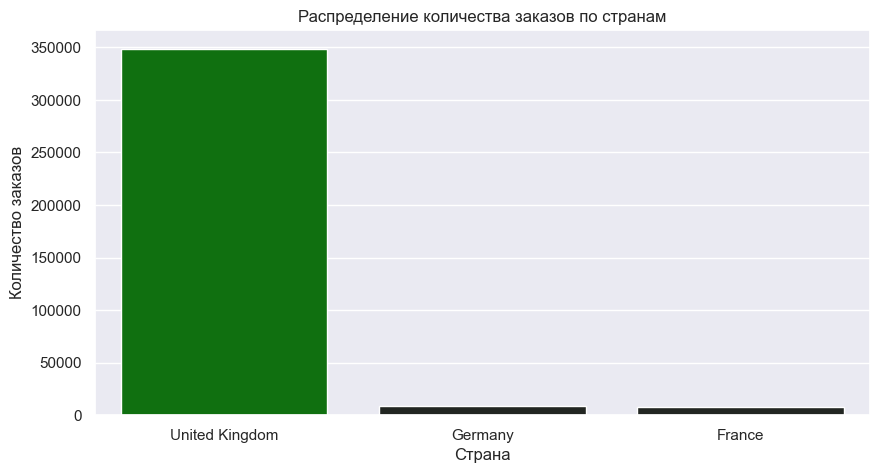

In [180]:
# Группируем количество заказов по странам
orders_cnt_by_country = data.groupby('Country', as_index=False)['Quantity'].count()

# Строим столбчатую диаграмму распределения количества заказов по странам
plt.figure(figsize=(10, 5))

barplot = sns.barplot(orders_cnt_by_country.nlargest(3, 'Quantity'),
              x='Country',
              y='Quantity',
              hue='Quantity',
              palette='dark:green',
              legend=False
)
barplot.set_title('Распределение количества заказов по странам')
barplot.set_xlabel('Страна')
barplot.set_ylabel('Количество заказов');

In [181]:
# Выводим полученную ранее таблицу
orders_cnt_by_country.sort_values(by='Quantity', ascending=False)

,Country,Quantity
35,United Kingdom,348872
14,Germany,8643
13,France,8019
10,EIRE,7126
30,Spain,2417
23,Netherlands,2322
3,Belgium,1935
32,Switzerland,1810
26,Portugal,1416
0,Australia,1180


Теперь добавим в датасет общую цену заказа, назовём её `TotalPrice`.

Общая цена заказа будет рассчитывается как:

<center>

$общая \ цена = цена \ за \ единицу \ товара \times (количество \ товаров \ в \ заказе - количество \ возвращённых \ товаров).$

In [182]:
# Создаём интересующий нас столбец
data['TotalPrice'] = data['UnitPrice'] * (data['Quantity'] - data['QuantityCanceled'])

# Выводим информацию о средней общей стоимости заказов и проверяем результат добавления столбца
print(f'Средняя общая стоимость заказов равна: {round(data['TotalPrice'].mean())}')
data.head()

Cредняя общая стоимость заказов равна: 21


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34


Построим визуализацию и выделим топ-3 стран, клиенты из которых приносят компании больше всего выручки:

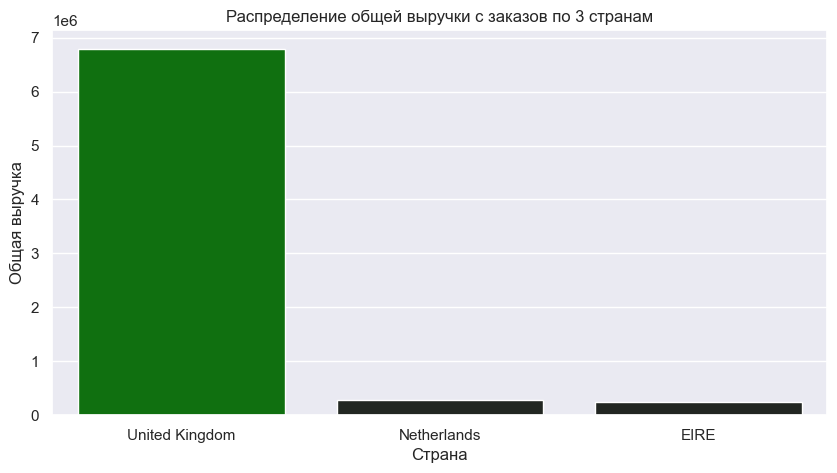

In [183]:
# Группируем общую выручку с заказов по 3 странам
most_income_countries = data.groupby('Country', as_index=False)['TotalPrice'].sum().nlargest(3, 'TotalPrice')

# Строим столбчатую диаграмму распределения общей выручки с заказов по 3 странам
plt.figure(figsize=(10, 5))

barplot = sns.barplot(most_income_countries,
              x='Country',
              y='TotalPrice',
              hue='TotalPrice',
              palette='dark:green',
              legend=False
)
barplot.set_title('Распределение общей выручки с заказов по 3 странам')
barplot.set_xlabel('Страна')
barplot.set_ylabel('Общая выручка');

In [184]:
# Выводим полученную ранее таблицу
most_income_countries

,Country,TotalPrice
35,United Kingdom,6797691.44
23,Netherlands,283443.54
10,EIRE,247074.57


Интересно, что Нидерланды находятся на шестом месте по количеству заказов, однако из-за того что эти заказы оптовые, по выручке Нидерланды находятся на втором месте.

Теперь займёмся временными характеристиками.


Добавим в таблицу с транзакциями признаки месяца, дня недели и часа совершения покупки.

Далее построим визуализацию, отражающую распределение суммарной выручки от заказов по месяцам:

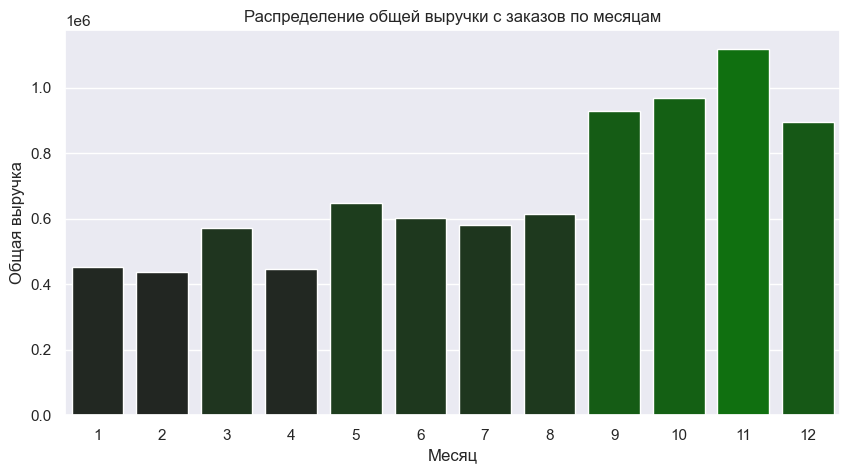

In [185]:
# Добавляем столбцы с информацией о месяце, дне недели и часе совершения покупки
data['Month'] = data['InvoiceDate'].dt.month
data['Day Of Week'] = data['InvoiceDate'].dt.day_of_week
data['Hour'] = data['InvoiceDate'].dt.hour

# Группируем общую выручку с заказов по месяцам
income_by_month = data.groupby('Month', as_index=False)['TotalPrice'].sum()

# Строим столбчатую диаграмму распределения общей выручки с заказов по месяцам
plt.figure(figsize=(10, 5))

barplot = sns.barplot(income_by_month,
              x='Month',
              y='TotalPrice',
              hue='TotalPrice',
              palette='dark:green',
              legend=False
)
barplot.set_title('Распределение общей выручки с заказов по месяцам')
barplot.set_xlabel('Месяц')
barplot.set_ylabel('Общая выручка');

In [186]:
# Выводим полученную ранее таблицу
income_by_month.sort_values(by='TotalPrice', ascending=False)

,Month,TotalPrice
10,11,1119641.60
9,10,967436.46
8,9,928554.44
11,12,894126.86
4,5,647403.81
7,8,614704.38
5,6,601238.45
6,7,581019.35
2,3,571941.01
0,1,453560.68


Cамым прибыльным для компании месяцем является ноябрь, что не удивительно. Такой результат объясняется довольно просто: ноябрь предшествует декабрю, а в декабре отмечаются католическое Рождество и Новый год. Так как мы анализируем данные магазина подарков, то совсем неудивительно, что мы видим максимальный рост продаж в преддверии этих праздников.

Построим визуализацию количества заказов для каждого дня недели:

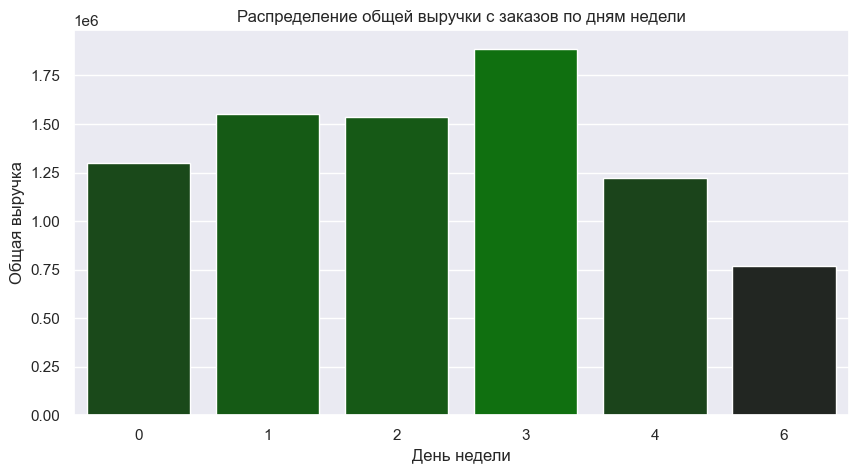

In [187]:
# Группируем общую выручку с заказов по дням недели
income_by_day_of_week = data.groupby('Day Of Week', as_index=False)['TotalPrice'].sum()

# Строим столбчатую диаграмму распределения общей выручки с заказов по дням недели
plt.figure(figsize=(10, 5))

barplot = sns.barplot(income_by_day_of_week,
              x='Day Of Week',
              y='TotalPrice',
              hue='TotalPrice',
              palette='dark:green',
              legend=False
)
barplot.set_title('Распределение общей выручки с заказов по дням недели')
barplot.set_xlabel('День недели')
barplot.set_ylabel('Общая выручка');

In [188]:
# Выводим полученную ранее таблицу
income_by_day_of_week.sort_values(by='TotalPrice', ascending=False)

,Day Of Week,TotalPrice
3,3,1888101.69
1,1,1552138.73
2,2,1535711.83
0,0,1300385.00
4,4,1219558.24
5,6,767697.50


Согласно данным, нет ни одной транзакции, совершённой в субботу, что довольно странно. Возможно, суббота является выходным днём и транзакции в этот день не совершаются, а может быть, это ошибка в данных.

Выделим дату из признака времени совершения транзакции, затем сгруппируем данные по датам и часам совершения транзакции и найдём количество заказов на каждый день-час.

Итоговая таблица позволит нам построить визуализацию, отражающую распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции):

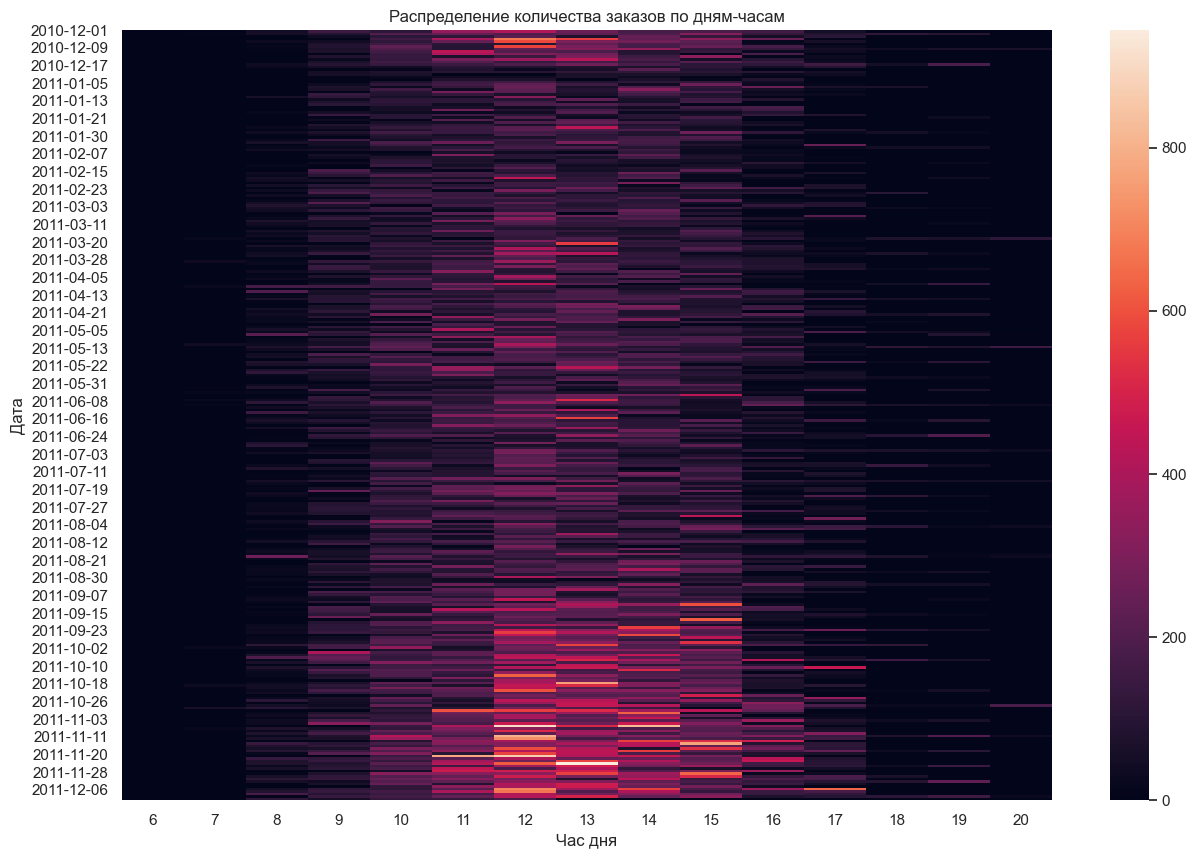

In [189]:
# Добавляем столбец с информацией о дате совершения покупки
data['Date'] = data['InvoiceDate'].dt.date

# Создаём сводную таблицу с информацией о количестве заказов за каждый день-час
orders_by_date_hour = data.pivot_table(
    values='Quantity',
    index='Date',
    columns='Hour',
    aggfunc='count',
    fill_value=0)

# Строим тепловую карту распределения количества заказов по дням-часам
plt.figure(figsize=(15, 10))

heatmap = sns.heatmap(orders_by_date_hour)
heatmap.set_title('Распределение количества заказов по дням-часам')
heatmap.set_xlabel('Час дня')
heatmap.set_ylabel('Дата');

In [190]:
# Выводим полученную ранее сводную таблицу
orders_by_date_hour

Hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Date,,,,,,,,,,,,,,,
2010-12-01,0,0,45,149,114,351,412,256,174,183,159,49,0,0,0
2010-12-02,0,10,52,87,201,240,196,232,186,316,128,88,122,99,0
2010-12-03,0,0,0,36,104,111,220,72,246,127,55,105,0,0,0
2010-12-05,0,0,0,0,160,388,676,557,234,327,248,0,0,0,0
2010-12-06,0,0,31,42,115,250,585,295,274,224,17,56,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-05,0,0,48,120,117,220,704,367,563,177,364,643,0,0,0
2011-12-06,0,0,88,137,163,397,668,196,404,127,141,171,0,0,0
2011-12-07,0,0,179,95,141,175,412,277,323,266,140,119,0,0,0


Из увиденного мы можем сделать следующие выводы: 

* Больше всего заказов совершается в дневное время, в интервале от 10 до 15 часов.

* С 21 часа до 6 утра (включительно) заказы не поступают.

Последнее может быть связано с банальным временем приёма и обработки заказа.

# 4. RFM-сегментация клиентов: часть 1

✍ Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого воспользуемся очень популярным методом для анализа потребительской ценности под названием **RFM**. 

<center> <img src=https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@MATHML_pj6_5_1.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:

* `Recency` (Давность) — давность последней покупки клиента;

* `Frequency` (Частота) — общее количество покупок клиента;

* `Monetary Value` (Денежная ценность) — сколько денег потратил клиент.

Суть *RFM*-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов.

Для примера, вот так может выглядеть интерпретация кластеров для случая *RF*-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы же можем рассчитать *RFM*-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Итак, приступим к созданию нашей *RFM*-таблицы. 

Чтобы получить *RFM*-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* `Recency` для *i*-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения *i*-ым клиентом своей *j*-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате `datetime` — '2011-12-10 00:00:00').

* `Frequency` рассчитывается как общее количество уникальных заказов, которые совершил *i*-ый клиент.

* `Monetary Value` рассчитывается как общая сумма денег, которую *i*-ый клиент потратил на наши товары (с учетом возвратов).

Для проверки корректности созданной нами *RFM*-таблицы рассчитаем и выведем следующие показатели:

1) Сколько клиентов совершили покупку более 200 дней назад?

2) Сколько заказов в среднем делает клиент (за представленный годовой период)?

In [191]:
# Создаём точку t_0 (дату на один день «старше» всех дат в наших данных)
t_0 = pd.to_datetime('2011-12-10')

# Создаём агрегации для нахождения необходимых метрик
aggregation = {
    'InvoiceDate':  lambda x: (t_0 - x.max()).days,
    'InvoiceNo': lambda x: x.nunique(),
    'TotalPrice': lambda x: x.sum(),
}

# Группируем данные по клиентам и применяем ранее созданные агрегации
rfm = data.groupby('CustomerID').agg(aggregation)

# Переименовываем столбцы в соответствии с найденными метриками
rfm = rfm.rename(
    columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary', 'TotalQuantity': 'MeanQuantity'}
)
# Проверяем результат создания RFM-таблицы
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,0.00
12347,2,7,4310.00
12348,75,4,1437.24
12349,18,1,1457.55
12350,310,1,294.40


In [192]:
# Находим количество клиентов совершивших покупку более 200 дней назад и среднее количество заказов клиентов
print(f'Клиентов совершивших покупку более 200 дней назад: {rfm[rfm['Recency'] > 200].shape[0]}')
print(f'В среднем клиент делает: {np.round(rfm['Frequency'].mean())} заказов')

Клиентов совершивших покупку более 200 дней назад: 743
В среднем клиент делает: 4.0 заказов


Теперь давайте взглянем на коробчатые диаграммы для каждого из признаков:

<center>

![image](data/newplot.png)

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма *KMeans*, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра `Frequency` или параметра `Monetary` выше, чем у 95 % клиентов.

Удалим из *RFM*-таблицы записи о клиентах, для которых выполняется хотя бы одно из условий:

$$frequency >frequency_{0.95}$$

$$monetary >monetary_{0.95}$$ 

где $frequency_{0.95}$ и $monetary_{0.95}$ - квантили уровня 0.95 для соответствующих признаков.

In [193]:
# Создаём переменные с интересующими нас квантилями
target_frequency = rfm['Frequency'].quantile(0.95)
target_monetary = rfm['Monetary'].quantile(0.95)

# Удаляем все записи, в которых значения столбцов 'Frequency' или 'Monetary' выходят за рамки квантилей
rfm_cleaned = rfm.drop(index=rfm[(rfm['Frequency'] > target_frequency) | (rfm['Monetary'] > target_monetary)].index)
# Проверяем результат очистки данных
print(f'Результирующий размер таблицы: {rfm_cleaned.shape}')
rfm_cleaned.head()

Результирующий размер таблицы: (4044, 3)


,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,0.00
12347,2,7,4310.00
12348,75,4,1437.24
12349,18,1,1457.55
12350,310,1,294.40


После удаления выбросов у нас получились следующие коробчатые диаграммы:

<center>

![image](data/newplot_2.png)

Мы наконец добрались до этапа кластеризации. Для начала нам необходимо оценить, как распределены наблюдения в пространстве признаков. Благо, у нас всего три параметра, по которым мы хотим кластеризовать клиентов, поэтому данные можно визуализировать в виде трёхмерной диаграммы рассеяния. 

Построим визуализацию нашего трёхмерного пространства признаков:


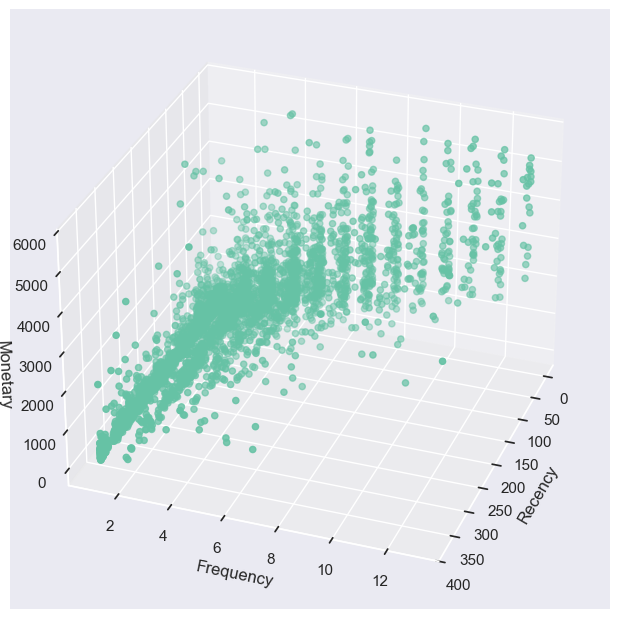

In [194]:
# Создаём трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# Добавим дополнительную ось в объект картинки
fig.add_axes(ax)
ax.azim = 20
ax.elev = 30

# Визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(
    rfm_cleaned['Recency'].to_list(), 
    rfm_cleaned['Frequency'].to_list(),
    rfm_cleaned['Monetary'].to_list()
)
# Добавляем оси
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary');

Что здесь можно увидеть? На самом деле, ничего конкретного. Да, видно, что есть клиенты с большими значениями параметров `Monetary` и `Frequency` — вероятно, это лучшие клиенты, которые покупают чаще всего и приносят больше всего денег. Однако по общей массе точек сложно сказать, сколько кластеров у нас есть — скорее даже кажется, что пространство не поддаётся кластеризации.

Потому призовём на помощь методы снижения размерности.

Начнём с метода главных компонент (*PCA*). Нам известно, что для его стабильной работы данные необходимо стандартизировать/нормализовать. 

Для удобства обернём все эти шаги по предобработке данных в *pipeline*.

Создадим *pipeline*, в котором будут следующие шаги:

* Стандартизация с помощью *StandardScaler* с параметрами по умолчанию; 

* Метод главных компонент с двумя компонентами.

Обучим наш *pipeline* на *RFM*-таблице, очищенной от выбросов, и применим к ней трансформацию.

Дополнительно выясним, какую долю дисперсии исходных данных объясняет первая главная компонента?

In [195]:
# Создаём объект класса 'Pipeline' и передаём в него необходимые шаги по обработке данных 
pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2))])
# Обучаем наш 'Pipeline' и трансформируем нашу очищенную RFM-таблицу
rfm_processed = pipe.fit_transform(rfm_cleaned)

# Узнаем, какую долю дисперсии исходных данных объясняет первая главная компонента
print(f'Доля дисперсии исходных данных которая объясняет первая главная компонента: {round(pipe['pca'].explained_variance_ratio_[0], 2)}')
# Проверяем результат работы 'Pipeline' над очищенной RFM-таблицей
rfm_processed

Доля дисперсии исходных данных которая объясняет первая главная компонента: 0.68


array([[-2.13520066,  1.40159569],
       [ 3.44712453,  0.85287213],
       [ 0.62910337,  0.08321704],
       ...,
       [-1.42102558,  0.16834651],
       [-0.31933001, -1.19828491],
       [ 0.77186997, -0.15752725]])

Визуализировав пространство главных компонент после декомпозиции мы получим следующую картину:

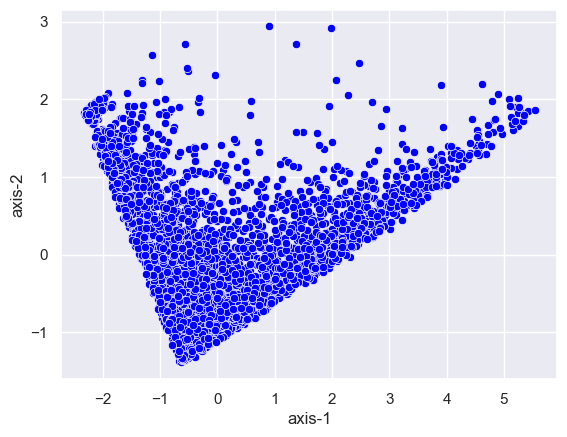

In [196]:
# Для удобства визуализации оборачиваем полученный массив в 'DataFrame'
rfm_processed = pd.DataFrame(rfm_processed, columns=['axis-1', 'axis-2'], index=rfm_cleaned.index)

# Визуализируем пространство главных компонент после декомпозиции
sns.scatterplot(
    rfm_processed,
    x='axis-1',
    y='axis-2',
    color='blue');

Судя по форме пространства, мы можем с уверенностью сказать, что нам не подойдут алгоритмы, основанные на плотности, такие как *DBSCAN*, так как точки расположены очень близко друг к другу и большая часть точек будет определена в единый кластер, что не имеет смысла. Поэтому попробуем разделить это пространство главных компонент на сегменты.

Попробуем воспользоваться методом *k-means*. 

Подберём оптимальное количество кластеров для метода *k-means* с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. В качестве значения параметра `random_state` возьмём классическое число 42. Остальные параметры оставим по умолчанию.

Для удобства восприятия визуализируем полученные результаты метода и судя по полученным результатам определим, какое количество кластеров лучше всего взять а также чему будет равно максимальное значение коэффициента силуэта?

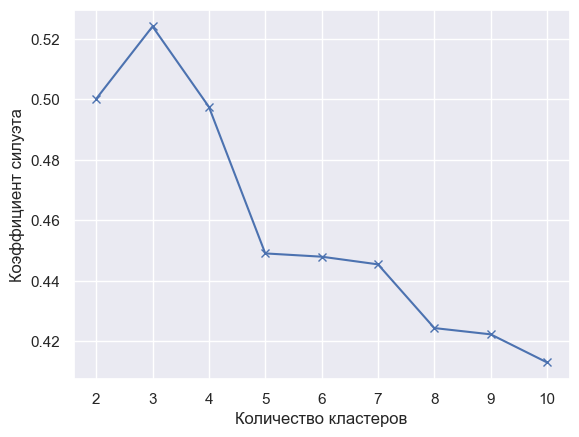

In [197]:
# Создаём функцию нахождения коэффициента силуэта
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

# Создаём список для будущих коэффициентов
silhouettes = []
# В цикле перебираем возможные значения количества кластеров
for i in range(2, 11):
    # Добавляем в ранее созданный список значение коэффициента силуэта для i количества кластеров 
    silhouettes.append(get_silhouette(i, rfm_processed))
    
# Визуализируем полученные значения коэффициентов для всех значений количества кластеров
plt.xlabel('Количество кластеров', fontsize=12)
plt.ylabel('Коэффициент силуэта', fontsize=12)
plt.plot([i for i in range(2, 11)], silhouettes, 'xb-');

In [198]:
# Выводим значение коэффициента силуэта для оптимального количества кластеров
print(f'Максимальное значение коэффициента силуэта равно: {np.round(silhouettes[1], 2)}')

Максимальное значение коэффициента силуэта равно: 0.52


Теперь возьмём *EM*-алгоритм.

Так же, как и в случае с *k-means* подберём оптимальное количество кластеров для *EM*-алгоритма (*GaussianMixture*) с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно.
В качестве значения параметра `random_state` снова возьмём число 42. Остальные параметры оставим по умолчанию:

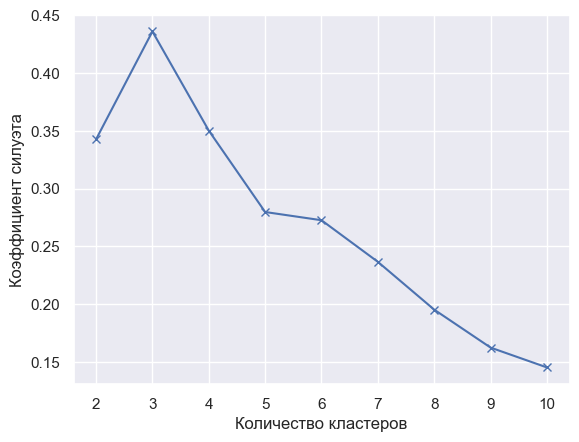

In [199]:
# Проводим шаги аналогичные для 'KMeans'
def get_silhouette(cluster_num, X):
    gm =  GaussianMixture(n_components=cluster_num, random_state=42)
    gm.fit(X)
    silhouette = silhouette_score(X, gm.predict(rfm_processed))
    return silhouette

silhouettes = []
for i in range(2, 11):
    silhouettes.append(get_silhouette(i, rfm_processed))
    
plt.xlabel('Количество кластеров', fontsize=12)
plt.ylabel('Коэффициент силуэта', fontsize=12)
plt.plot([i for i in range(2, 11)], silhouettes, 'xb-');

In [200]:
# Выводим значение коэффициента силуэта для оптимального количества кластеров
print(f'Максимальное значение коэффициента силуэта равно: {np.round(silhouettes[1], 2)}')

Максимальное значение коэффициента силуэта равно: 0.44


Посмотрим на распределение кластеров.

Сначала нужно определить лучшую модель. Очевидно, что лучше с задачей справился метод *k-means*, а значит именно его мы и обучим как лучшую модель с подобранным ранее количеством кластеров на декомпозированных данных и определим, сколько клиентов попало в самый большой кластер:

In [201]:
# Обучаем лучшую модель с оптимальным количеством кластеров
k_means =  KMeans(n_clusters=3, random_state=42).fit(rfm_processed)

# Находим и выводим полученное количество клиентов в каждом кластере
cluster_sizes = np.unique(k_means.labels_, return_counts=True)
print(cluster_sizes)

(array([0, 1, 2]), array([ 773, 1001, 2270], dtype=int64))


Визуализируем результаты кластеризации:

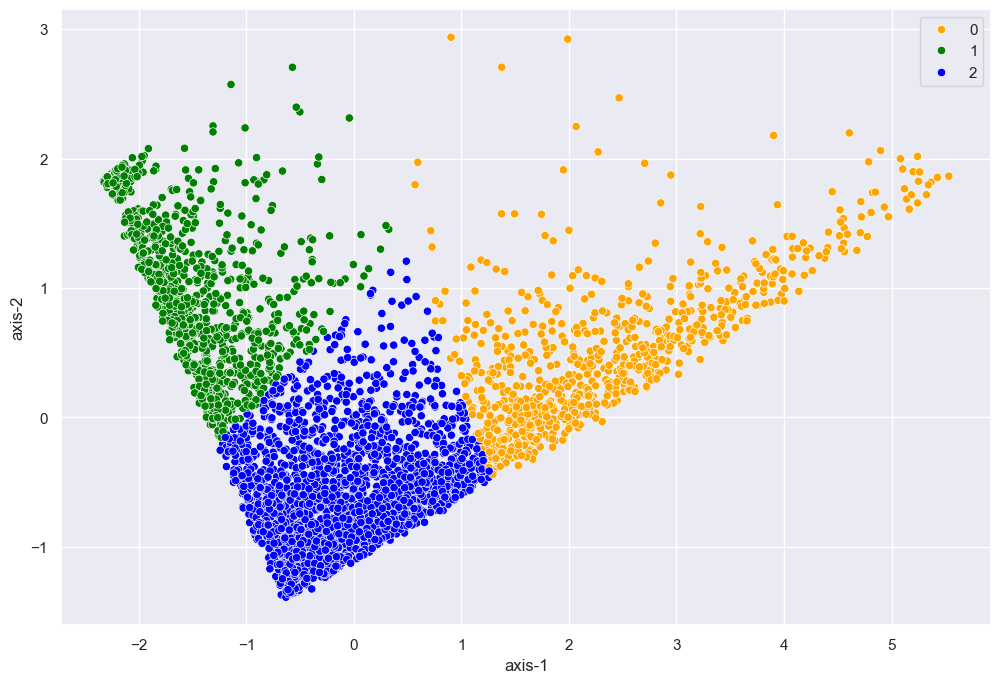

In [202]:
# Визуализируем результаты кластеризации
fig = plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=rfm_processed, 
    x='axis-1', 
    y='axis-2', 
    hue=k_means.labels_,
    palette=['orange', 'green', 'blue']
);

Итак, у нас есть три сегмента клиентов. Давайте попробуем составить профиль для этих сегментов.

Для составления профиля кластеров нам необходимо вернуться от декомпозированных данных к *RFM*-таблице, очищенной от выбросов. Сгруппируем *RFM*-таблицу по полученным кластерам и рассчитаем среднее по каждому из признаков:

In [203]:
# Обучаем лучшую модель с оптимальным количеством кластеров
k_means =  KMeans(n_clusters=3, random_state=42).fit(rfm_cleaned)
# Создаём столбец характеризующий принадлежность клиента к кластеру
rfm_cleaned['Label'] = k_means.predict(rfm_cleaned)

# Группируем RFM-таблицу по признаку кластера и находим среднее значение каждой из метрик
rfm_grouped = rfm_cleaned.groupby('Label')[['Recency', 'Frequency', 'Monetary']].mean().round()
# Проверяем результат группировки RFM-таблицы
rfm_grouped

,Recency,Frequency,Monetary
Label,,,
0,52.0,5.0,1679.0
1,120.0,2.0,427.0
2,36.0,7.0,3613.0


Сейчас мы воспользуемся с одним из способов визуализации профиля кластеров — **Radar Chart (полярная, или лепестковая, диаграмма)**. Это графическое представление значений нескольких эквивалентных категорий в форме «паутины».

На концах «паутины» мым откладываем оси, которые соответствуют признакам, описывающим объекты. На каждой из осей для каждого кластера откладываем средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Для примера, возьмём полярную диаграмму для задачи кластеризации учеников по интересам:

<p align="center">

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

</p>

На данной диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие к данному кластеру, в большей степени увлекаются музыкой (`Music`), а в меньшей степени — программированием (`Programm`).

Возвращаемся же к теме нашего проекта.

В модуле `graph_objects` библиотеки *plotly* есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы реализуем собственную функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У этой функции два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов) и `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Поэтому шаг с нормализацией мы также добавим в реализацию функции `plot_cluster_profile()`:

In [204]:
def plot_cluster_profile(grouped_data, n_clusters):
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем ее на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # Радиусы
            theta=features, # Название засечек
            fill='toself', # Заливка многоугольника цветом
            name=f'Cluster {i}', # Название - номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # Отображение легенды
        autosize=False, # Устанавливаем свои размеры графика
        width=800, # Ширина (в пикселях)
        height=800, # Высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

Теперь у нас есть удобный инструмент для анализа профиля кластеров. Пришло время воспользоваться им.

Визуализируем профили кластеров в виде полярной диаграммы на основе средних *RFM*-характеристик, вычисленных для каждого кластера. Проанализируем кластеры и на основе анализа сопоставим номер кластера к его описанию:

In [205]:
# Визуализируем профили кластеров в виде полярной диаграммы на основе средних RFM-характеристик
plot_cluster_profile(rfm_grouped, 3)

* **Кластер-2** соответствует «лояльным» клиентам, которые приносят наибольший доход, совершают покупки чаще всего, а давность их последней покупки наименьшая.

* **Кластер-0** соответствует «промежуточным» клиентам, которые являются активными, но покупают не так часто и много, как лояльные клиенты. В то же время эти клиенты не являются «потерянными».

* **Кластер-1** соответствует «потерянным» клиентам, которые купили меньше всего товара, и их последняя покупка была совершена очень давно.

# 5. RFM-сегментация клиентов: часть 2

✍ Итак, с помощью *RFM*-анализа нам удалось выделить три сегмента клиентов. Однако в маркетинге принято оперировать большим их количеством: обычно маркетологи стараются создать стратегию хотя бы для пяти-семи клиентских сегментов в градации от «лояльных» до «потерянных» с промежуточными категориями.

Поэтому, получив обратную связь от маркетологов, мы вновь принимаемся за работу, пытаясь модифицировать полученное решение.

Ранее мы производили кластеризацию в пространстве главных компонент используя линейным метод *PCA* для отображения исходного пространства признаков в его сжатую версию.

А что если использовать нелинейную трансформацию? Например, алгоритм снижения размерности *t-SNE*? Попробуем и посмотрим, что получится.

Воспользуемся алгоритмом *t-SNE* и трансформируем *RFM*-таблицу, очищенную от выбросов, в двухмерное представление. Также заранее позаботимся о масштабировании признаков.

Как и ранее для удобства обернём шаги по предобработке данных в *pipeline*.

Мы создадим *pipeline*, который будет содержать следующие шаги:

* Стандартизация с помощью *StandardScaler* с параметрами по умолчанию; 

* Алгоритм *t-SNE* с двумя компонентами, параметрами `perplexity=50` и `random_state=100`.

Обучим ваш *pipeline* на *RFM*-таблице (очищенной от выбросов), полученной ранее, и применим к ней трансформацию.

Для справки также выясним, чему равно значение дивергенции Кульбака — Лейблера (это функция потерь, которая минимизируется при обучения алгоритма *t-SNE*. Она показывает меру расстояния между двумя распределениями) для обученного алгоритма *t-SNE*.

Дополнительно необходимо проследить за тем, чтобы в нашей *RFM*-таблице не было утечки данных — меток кластеров, которые мы определяли на предыдущем этапе. В нашей таблице должны присутствовать только три признака: `Recency`, `Frequency` и `Monetary`!

In [206]:
# Избавляемся от ранее найденных меток кластеров
rfm_cleaned = rfm_cleaned.drop(columns='Label')

# Создаём объект класса 'Pipeline' и передаём в него необходимые шаги по обработке данных 
pipe = Pipeline([('scaler', StandardScaler()), ('t_sne', TSNE(n_components=2, perplexity=50, random_state=100))])
# Обучаем наш 'Pipeline' и трансформируем нашу очищенную RFM-таблицу
rfm_processed = pipe.fit_transform(rfm_cleaned)

# Узнаем значение дивергенции Кульбака — Лейблера для обученного алгоритма t-SNE
print(f'Значение дивергенции Кульбака — Лейблера для обученного алгоритма t-SNE равно: {round(pipe['t_sne'].kl_divergence_, 2)}')
# Проверяем результат работы 'Pipeline' над очищенной RFM-таблицей
rfm_processed

Значение дивергенции Кульбака — Лейблера для обученного алгоритма t-SNE равно: 0.54


array([[ -5.096237 ,  32.75     ],
       [ 19.839493 ,  30.269058 ],
       [ 30.227396 ,  -1.9209019],
       ...,
       [-39.459114 ,  14.812618 ],
       [ -8.486209 , -42.22667  ],
       [ 21.336798 , -15.655113 ]], dtype=float32)

Визуализировав пространство после декомпозиции с помощью *t-SNE*, мы получим следующую картину:

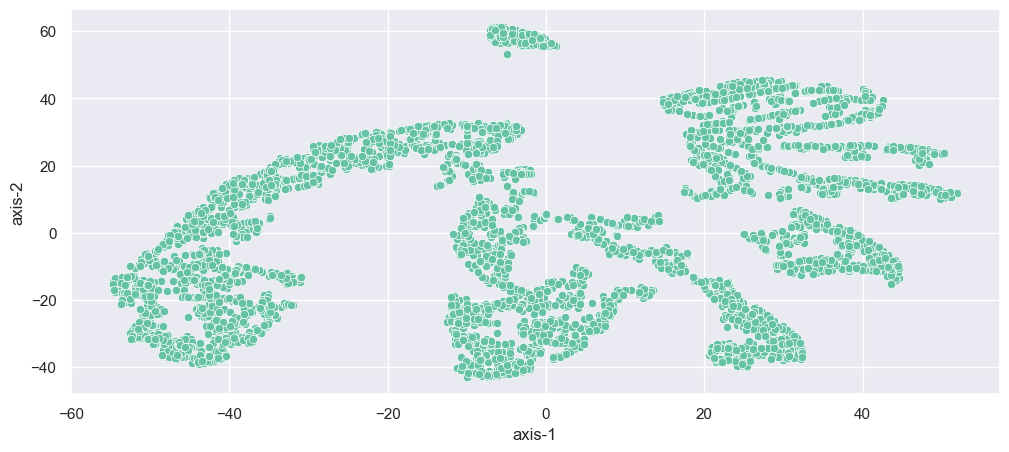

In [207]:
# Для удобства визуализации оборачиваем полученный массив в 'DataFrame'
rfm_processed = pd.DataFrame(rfm_processed, columns=['axis-1', 'axis-2'], index=rfm_cleaned.index)

# Визуализируем пространство после декомпозиции с помощью t-SNE
fig = plt.figure(figsize=(12, 5))

sns.scatterplot(data=rfm_processed, x='axis-1', y='axis-2');

Как и ожидалось от *t-SNE*, алгоритм сгруппировал наиболее похожие объекты в подобие кластеров, причём эти кластеры легко определить.

Теперь воспользуемся алгоритмами кластеризации, чтобы сформировать новые сегменты клиентов.

Вновь воспользуемся методом *k-means*. 

Мы подберём оптимальное количество кластеров для метода *k-means* с помощью коэффициента силуэта, перебирая возможные значения от 3 до 8 включительно. В качестве значения параметра `random_state` как и всегда возьмём число 42. Остальные параметры оставим по умолчанию. Полученные результаты визуализируем:

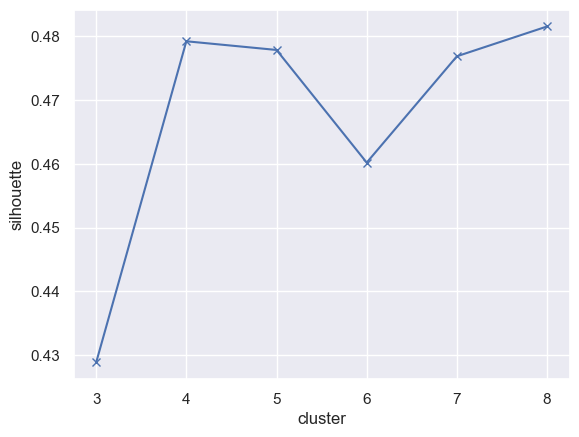

In [208]:
# Проводим шаги аналогичные предыдущей части RFM-сегментации клиентов
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouettes = []
for i in range(3, 9):
    silhouettes.append(get_silhouette(i, rfm_processed))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(3, 9)], silhouettes, 'xb-');

In [209]:
# Выводим значение коэффициента силуэта для оптимального количества кластеров
print(f'Максимальное значение коэффициента силуэта равно: {np.round(silhouettes[-1], 3)}')

Максимальное значение коэффициента силуэта равно: 0.4819999933242798


Также не забываем воспользоваться *EM*-алгоритмом. 

Подберём оптимальное количество кластеров для *EM*-алгоритма (*GaussianMixture*) с помощью коэффициента силуэта, перебирая возможные значения от 3 до 8 включительно. В качестве значения параметра `random_state` возьмём число 42. Остальные параметры оставим по умолчанию. Результаты визуализируем:

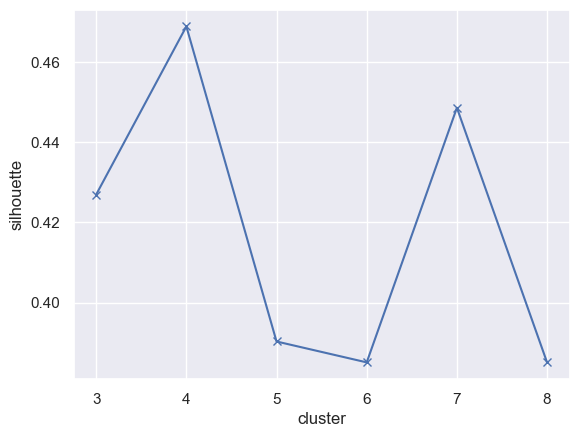

In [210]:
# Проводим шаги аналогичные предыдущей части RFM-сегментации клиентов
def get_silhouette(cluster_num, X):
    gm =  GaussianMixture(n_components=cluster_num, random_state=42)
    gm.fit(X)
    silhouette = silhouette_score(X, gm.predict(rfm_processed))
    return silhouette

silhouettes = []
for i in range(3, 9):
    silhouettes.append(get_silhouette(i, rfm_processed))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(3, 9)], silhouettes, 'xb-');

In [211]:
# Выводим значение коэффициента силуэта для оптимального количества кластеров
print(f'Максимальное значение коэффициента силуэта равно: {np.round(silhouettes[1], 3)}')

Максимальное значение коэффициента силуэта равно: 0.4690000116825104


Наконец, попробуем воспользоваться алгоритмом агломеративной кластеризации (*AgglomerativeClustering*).

Как и в случае со всеми предыдущими алгоритмами мы подберём оптимальное количество кластеров для алгоритма агломеративной кластеризации с помощью коэффициента силуэта, перебирая возможные значения от 2 до 8 включительно. Все параметры, за исключением числа кластеров, мы оставим по умолчанию. Полученные результаты визуализируем:

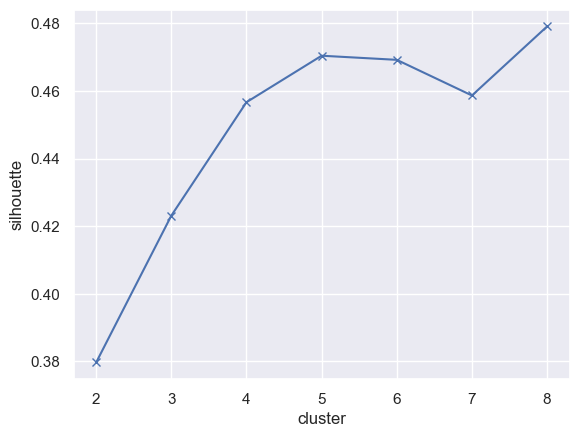

In [212]:
# Проводим шаги аналогичные предыдущей части RFM-сегментации клиентов
def get_silhouette(cluster_num, X):
    clustering =  AgglomerativeClustering(n_clusters=cluster_num)
    clustering.fit(X)
    silhouette = silhouette_score(X, clustering.labels_)
    return silhouette

silhouettes = []
for i in range(2, 9):
    silhouettes.append(get_silhouette(i, rfm_processed))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 9)], silhouettes, 'xb-');

In [213]:
# Выводим значение коэффициента силуэта для оптимального количества кластеров
print(f'Максимальное значение коэффициента силуэта равно: {np.round(silhouettes[-1], 3)}')

Максимальное значение коэффициента силуэта равно: 0.4790000021457672


Снова посмотрим на распределение кластеров.

Как и в прошлый раз, сначала нам нужно определить лучшую модель. И, как и в прошлый раз, алгоритм *k-means* показал наилучший результат. Его мы и обучим как лучшую модель с подобранным ранее количеством кластеров на декомпозированных данных и посмотрим, сколько клиентов на этот раз попало в самый большой кластер:

In [214]:
# Обучаем лучшую модель с оптимальным количеством кластеров
k_means = KMeans(n_clusters=8, random_state=42).fit(rfm_processed)

# Находим и выводим полученное количество клиентов в каждом кластере
cluster_sizes = np.unique(k_means.labels_, return_counts=True)
print(cluster_sizes)

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([688, 464, 355, 656, 538, 539, 399, 405], dtype=int64))


Визуализируем результаты кластеризации:

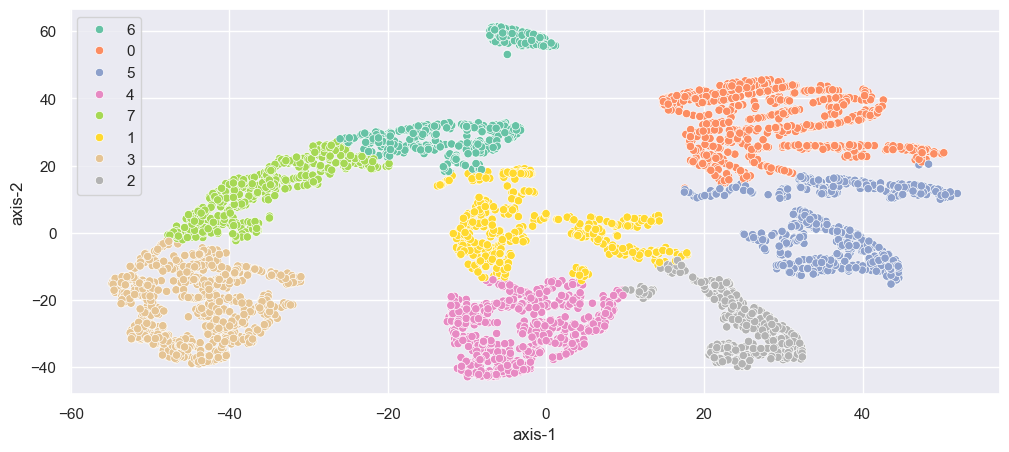

In [215]:
# Визуализируем результаты кластеризации
fig = plt.figure(figsize=(12, 5))

sns.scatterplot(data=rfm_processed, x='axis-1', y='axis-2', hue=k_means.labels_.astype('str'));

Итак, у нас есть 8 сегментов клиентов. Попробуем составить профиль для этих сегментов.

Для составления профиля кластеров нам вновь необходимо вернуться от декомпозированных данных к *RFM*-таблице (очищенной от выбросов).

Мы сгруппируем *RFM*-таблицу по полученным кластерам и рассчитаем среднее по каждому из признаков. Для наглядности округлим все значения в столбцах до целого числа:

In [216]:
# Обучаем лучшую модель с оптимальным количеством кластеров
k_means =  KMeans(n_clusters=8, random_state=42).fit(rfm_cleaned)
# Создаём столбец характеризующий принадлежность клиента к кластеру
rfm_cleaned['Label'] = k_means.predict(rfm_cleaned)

# Группируем RFM-таблицу по признаку кластера и находим среднее значение каждой из метрик
rfm_grouped = rfm_cleaned.groupby('Label')[['Recency', 'Frequency', 'Monetary']].mean().round()
# Проверяем результат группировки RFM-таблицы
rfm_grouped

,Recency,Frequency,Monetary
Label,,,
0,54.0,4.0,1459.0
1,89.0,2.0,548.0
2,38.0,7.0,2807.0
3,72.0,3.0,955.0
4,34.0,7.0,3721.0
5,47.0,6.0,2058.0
6,25.0,9.0,4946.0
7,152.0,1.0,214.0


Теперь мы можем визуализировать профили кластеров в виде полярной диаграммы на основе средних *RFM*-характеристик, вычисленных для каждого кластера, проанализировать кластеры и на основе анализа сопоставить номер кластера и его описание:

In [217]:
# Визуализируем профили кластеров в виде полярной диаграммы на основе средних RFM-характеристик
plot_cluster_profile(rfm_grouped, 8)

* **Кластер-6** соответствует «лояльным» клиентам, которые приносят наибольший доход, совершают покупки чаще всего, а давность их последней покупки наименьшая.

* **Кластер-4** соответствует «перспективным» клиентам, которые являются активными покупателями, но покупают не так часто и не так много, как лояльные клиенты.

* **Кластер-2** соответствует «повисшие» клиентам, которые относительно недавно сделали несколько заказов на небольшие суммы. Потенциально эти клиенты могут быть переведены в кластер «перспективных».

* **Кластер-5** соответствует «неопределённым» клиентам, которые совершили больше заказов, чем «новички», но меньше, чем «повисшие».

* **Кластер-0** соответствует клиентам-«новичкам», которые относительно недавно сделали один заказ на небольшую сумму.

* **Кластер-3** соответствует клиентам «в зоне риска», которые несколько раз покупали товары на небольшие суммы, однако их последняя покупка была совершена более пяти месяцев назад. 

* **Кластер-1** соответствует «спящим» или «почти потерянным» клиентам, которые сделали один заказ на маленькую сумму более семи месяцев назад и больше не возвращались.

* **Кластер-7** соответствует «потерянным» клиентам, которые купили меньше всего товара, и их последняя покупка была совершена около года назад.

⭐ Мы справились с задачей и произвели сегментацию клиентов с помощью *RFM*-анализа. Однако остался ещё один шаг — сделать предсказание сегмента для клиентов, которые не попали в обучающую выборку.

# 6. RFM-кластеризация клиентов: часть 3

✍ Нам удалось построить модель кластеризации для части клиентов. Но как сделать предсказание сегмента для клиентов, которые не попали в обучающую выборку?

Очевидно, воспользоваться методом `predict()`, однако всё не так просто.

Мы обучали наши алгоритмы кластеризации на сжатом с помощью *t-SNE* пространстве признаков. То есть, чтобы сделать предсказание для новых объектов, не попавших в выборку, нам необходимо будет совершить трансформацию признаков этих объектов в новое сжатое пространство. 

Однако проблема *t-SNE* заключается в том, что алгоритм непараметрический. Это значит, что он, в отличие от таких алгоритмов, как *PCA* и *SVD*, трансформирует пространство признаков для обучающей выборки, но не запоминает, каким образом это делает. Это значит, что, передав в алгоритм новые объекты для сжатия пространства, мы получим абсолютно новое представление пространства, не имеющее отношения к тому, что мы построили для обучающей выборки. То есть произойдёт искажение, что может привести к неверным результатам кластеризации.

Поэтому мы сведём задачу кластеризации к задаче классификации. Так как у нас теперь есть истинные метки кластеров, а есть клиенты, которые описываются *RFM*-характеристиками мы обучим модель, которая на основе *RFM*-характеристик будет предсказывать клиентский сегмент.

Для начала разделим исходные данные на тренировочную и тестовую выборки в соотношении 80/20. В качестве параметра `random_state` возьмём число 42:

In [218]:
# Создаём матрицу наблюдений 'X' и вектор правильных ответов 'y'
X = rfm_cleaned.drop(columns='Label') # Очищенная RFM-таблица
y = rfm_cleaned['Label'] # Метки кластеров, предсказанные ранее

# Проводим разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Размер выборки "X_train": {X_train.shape}')
print(f'Размер выборки "X_test": {X_test.shape}')
print('-'*40)
print(f'Размер выборки "y_train": {y_train.shape}')
print(f'Размер выборки "y_test": {y_test.shape}')

Размер выборки "X_train": (3235, 3)
Размер выборки "X_test": (809, 3)
----------------------------------------
Размер выборки "y_train": (3235,)
Размер выборки "y_test": (809,)


Дальше нам осталось только построить несколько моделей и выбрать из них лучшую. 

Так как алгоритм *t-SNE* является нелинейным методом понижения размерности, можно смело предположить, что линейные модели, такие как логистическая регрессия, в данной задаче нам мало чем помогут. Поэтому сразу возьмём ансамблевые алгоритмы.

Начнём со случайного леса. С помощью *GridSearchCV* организуем перебор параметров случайного леса (*RandomForestClassifier*) на следующей сетке параметров:

```py
param_grid = {
    'max_depth': range(5, 15),
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 500]
}
```

В качестве параметра `random_state` для модели случайного леса используем число 42. Количество фолдов для кросс-валидации — 5.

С помощью лучшей модели мы сделаем предсказание для тестовой выборки и рассчитаем все метрики при помощи функции `classification_report`:

In [219]:
# Создаём сетку подбираемых параметров в виде словаря 
param_grid = {
    'max_depth': range(5, 15),
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 500]
}

# Создаём и обучаем объект класса 'GridSearchCV'
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42), # ML-модель, для которой происходит подбор параметров
    param_grid=param_grid, # Сетка подбираемых параметров
    cv=5, # Количество фолдов для кросс-валидации
    n_jobs=-1).fit(X_train, y_train)

# Выводим значения оптимальных параметров модели
print(f'Оптимальные параметры модели "RandomForestClassifier": {grid_search_rf.best_params_}')

Оптимальные параметры модели "RandomForestClassifier": {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}


In [220]:
# Делаем предсказание на тестовой выборке
rf_y_test_pred = grid_search_rf.predict(X_test)

# Выводим значения метрик для тестовой выборки
print('Значения метрик для тестовой выборки:')
print('\n')
print(classification_report(y_test, rf_y_test_pred))

Значения метрик для тестовой выборки:


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        88
           1       0.99      0.99      0.99       179
           2       0.88      0.96      0.91        45
           3       1.00      1.00      1.00       123
           4       0.95      0.77      0.85        26
           5       0.96      0.98      0.97        53
           6       1.00      0.70      0.82        10
           7       1.00      1.00      1.00       285

    accuracy                           0.98       809
   macro avg       0.97      0.92      0.94       809
weighted avg       0.98      0.98      0.98       809



Итак, значение метрики `accuracy` очень высокое, но не идеальное. Попробуем его улучшить, воспользовавшись бустингом.

С помощью того же *GridSearchCV* организуем перебор параметров градиентного бустинга (*GradientBoostingClassifier*) на следующей сетке параметров:

```py
param_grid = {
    'max_depth': range(3, 7),
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 200, 500]
}
```

В качестве параметра `random_state` для модели градиентного бустинга используем число 42. Количество фолдов для кросс-валидации — 5. 

С помощью лучшей модели мы сделаем предсказание для тестовой выборки и рассчитаем все метрики при помощи функции `classification_report`:

In [221]:
# Проводим шаги аналогичные предыдущей ML-модели
param_grid = {
    'max_depth': range(3, 7),
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 200, 500]
}

grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1).fit(X_train, y_train)

print(f'Оптимальные параметры модели "RandomForestClassifier": {grid_search_gb.best_params_}')

Оптимальные параметры модели "RandomForestClassifier": {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200}


In [222]:
# Делаем предсказание на тестовой выборке
gb_y_test_pred = grid_search_gb.predict(X_test)

# Выводим значения метрик для тестовой выборки
print('Значения метрик для тестовой выборки:')
print('\n')
print(classification_report(y_test, gb_y_test_pred))

Значения метрик для тестовой выборки:


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.99      0.99      0.99       179
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00       123
           4       1.00      1.00      1.00        26
           5       1.00      0.98      0.99        53
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00       285

    accuracy                           1.00       809
   macro avg       1.00      1.00      1.00       809
weighted avg       1.00      1.00      1.00       809



Значения метрик не могут не радовать глаз, однако для более подробного сравнения двух моделей между собой рассчитаем каждую метрику по отдельности и обернём итоги наших расчётов в виде таблицы:

In [223]:
# Проводим точный расчёт каждой из метрик для модели 'RandomForestClassifier'
rf_accuracy = np.round(accuracy_score(y_test, rf_y_test_pred), 3)
rf_precision = np.round(precision_score(y_test, rf_y_test_pred, average='macro'), 3)
rf_recall = np.round(recall_score(y_test, rf_y_test_pred, average='macro'), 3)
rf_f1_score = np.round(f1_score(y_test, rf_y_test_pred, average='macro'), 3)

# Проводим точный расчёт каждой из метрик для модели 'GradientBoostingClassifier'
gb_accuracy = np.round(accuracy_score(y_test, gb_y_test_pred), 3)
gb_precision = np.round(precision_score(y_test, gb_y_test_pred, average='macro'), 3)
gb_recall = np.round(recall_score(y_test, gb_y_test_pred, average='macro'), 3)
gb_f1_score = np.round(f1_score(y_test, gb_y_test_pred, average='macro'), 3)

# Для удобства оборачиваем полученные значения метрик в 'DataFrame' 
models_score = pd.DataFrame(
    {
        'Model Name': ['RandomForestClassifier', 'GradientBoostingClassifier'],
        'Accuracy Score': [rf_accuracy, gb_accuracy],
        'Precision Score': [rf_precision, gb_precision],
        'Recall Score': [rf_recall, gb_recall],
        'F1 Score': [rf_f1_score, gb_f1_score]
        }
    )
# Выводим полученную нами таблицу
models_score

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,RandomForestClassifier,0.983,0.969,0.925,0.942
1,GradientBoostingClassifier,0.996,0.997,0.997,0.997


⭐ Отлично, мы справились с проблемой непараметричности *t-SNE* и смогли перейти от решения задачи кластеризации к задаче классификации. Теперь у нас есть модель, которая на основе RFM-характеристик клиента автоматически определяет его сегмент.